In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3>Loading Data-Train and test csv files</h3>

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Instacart/train.csv')  #train 
train.head()

,Unnamed: 0,user_id,order_hour_of_day,days_since_prior_order,Total orders,user_re_ratio,user_ntre_ratio,product_id,user_prd_re_ratio,times_cart_123,times_prd_last_5,prd_cart_last_5,prd_ntre_ratio,dow_re_ratio,dow_ntre_ratio,reordered
0,0,1,8,14.0,10,0.694915,0.305085,196,1.000000,9.0,5.0,6.4,0.223520,0.727273,0.409021,1.0
1,1,1,8,14.0,10,0.694915,0.305085,10258,1.000000,7.0,5.0,4.4,0.286228,0.727273,0.409021,1.0
2,2,1,8,14.0,10,0.694915,0.305085,10326,0.166667,0.0,0.0,2.6,0.347991,0.727273,0.409021,0.0
3,3,1,8,14.0,10,0.694915,0.305085,12427,1.000000,8.0,5.0,2.6,0.259265,0.727273,0.409021,0.0
4,4,1,8,14.0,10,0.694915,0.305085,13032,0.333333,0.0,2.0,1.4,0.342842,0.727273,0.409021,1.0


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Instacart/test.csv')  #test
test.head()

,Unnamed: 0,user_id,order_hour_of_day,days_since_prior_order,Total orders,user_re_ratio,user_ntre_ratio,product_id,user_prd_re_ratio,times_cart_123,times_prd_last_5,prd_cart_last_5,prd_ntre_ratio,dow_re_ratio,dow_ntre_ratio
0,0,3,15,11.0,12,0.625,0.375,248,0.090909,1.0,0.0,9.2,0.599749,0.0,0.0
1,1,3,15,11.0,12,0.625,0.375,1005,0.333333,0.0,1.0,15.8,0.559395,0.0,0.0
2,2,3,15,11.0,12,0.625,0.375,1819,0.333333,2.0,0.0,8.4,0.507838,0.0,0.0
3,3,3,15,11.0,12,0.625,0.375,7503,0.100000,0.0,0.0,6.6,0.446449,0.0,0.0
4,4,3,15,11.0,12,0.625,0.375,8021,0.090909,0.0,0.0,5.4,0.408843,0.0,0.0


**Dropping not required features**

In [ ]:
train.drop(['Unnamed: 0','order_hour_of_day','days_since_prior_order'],axis=1,inplace=True)

In [ ]:
test.drop(['Unnamed: 0','order_hour_of_day','days_since_prior_order'],axis=1,inplace=True)

In [ ]:
train.shape

(8474661, 13)

In [ ]:
test.shape

(4833292, 12)

<h3>droping class label:reordered from train and saving as y

In [ ]:
y=train['reordered']     #class label for train data
x=train.drop(['reordered'],axis=1)    #removing class labels from train data
y.head(2)

0    1.0
1    1.0
Name: reordered, dtype: float64

In [ ]:
y.value_counts()  #imbalance dataset

0.0    7645837
1.0     828824
Name: reordered, dtype: int64

**=>IMBALANCE DATASET**

<h2> Splitting  Train data into Train and cross validation: Stratified Sampling</h2>

In [ ]:
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.33, random_state=20,stratify=y)    #train, cv for random cv

Encoding numerical features for train,cv and test

In [ ]:
x_tr=x_train.copy()   #copy of train ,cv and test
x_cv=x_cv.copy()
te_df=test.copy()

In [ ]:
#Total orders
scalar=MinMaxScaler()
#reshape coz we want 2D vector
#reshape(-1,1) coz we have single feature  => column vector
#reshape(1,-1) if we have single sample,n-features  => row vector
scalar.fit(x_train['Total orders'].values.reshape(-1,1))    #fitting train data to transform both  train,cv and test
x_tr['Total orders']=scalar.transform(x_tr['Total orders'].values.reshape(-1,1))  
x_cv['Total orders']=scalar.transform(x_cv['Total orders'].values.reshape(-1,1)) 
te_df['Total orders']=scalar.transform(te_df['Total orders'].values.reshape(-1,1)) 

In [ ]:
#times_cart_123
scalar=MinMaxScaler()
#reshape coz we want 2D vector
#reshape(-1,1) coz we have single feature  => column vector
#reshape(1,-1) if we have single sample,n-features  => row vector
scalar.fit(x_train['times_cart_123'].values.reshape(-1,1))    #fitting train data to transform both test and train
x_tr['times_cart_123']=scalar.transform(x_tr['times_cart_123'].values.reshape(-1,1))  
x_cv['times_cart_123']=scalar.transform(x_cv['times_cart_123'].values.reshape(-1,1)) 
te_df['times_cart_123']=scalar.transform(te_df['times_cart_123'].values.reshape(-1,1)) 

In [ ]:
#times_prd_last_5
scalar=MinMaxScaler()
#reshape coz we want 2D vector
#reshape(-1,1) coz we have single feature  => column vector
#reshape(1,-1) if we have single sample,n-features  => row vector
scalar.fit(x_train['times_prd_last_5'].values.reshape(-1,1))    #fitting train data to transform both test and train
x_tr['times_prd_last_5']=scalar.transform(x_tr['times_prd_last_5'].values.reshape(-1,1))  
x_cv['times_prd_last_5']=scalar.transform(x_cv['times_prd_last_5'].values.reshape(-1,1)) 
te_df['times_prd_last_5']=scalar.transform(te_df['times_prd_last_5'].values.reshape(-1,1)) 

In [ ]:
#prd_cart_last_5
scalar=MinMaxScaler()
#reshape coz we want 2D vector
#reshape(-1,1) coz we have single feature  => column vector
#reshape(1,-1) if we have single sample,n-features  => row vector
scalar.fit(x_train['prd_cart_last_5'].values.reshape(-1,1))    #fitting train data to transform both test and train
x_tr['prd_cart_last_5']=scalar.transform(x_tr['prd_cart_last_5'].values.reshape(-1,1))  
x_cv['prd_cart_last_5']=scalar.transform(x_cv['prd_cart_last_5'].values.reshape(-1,1)) 
te_df['prd_cart_last_5']=scalar.transform(te_df['prd_cart_last_5'].values.reshape(-1,1)) 

<h3>resetting index to user_id and product_id</h3>

In [ ]:
x_tr=x_tr.set_index(['user_id','product_id'])
x_tr.head()

,,Total orders,user_re_ratio,user_ntre_ratio,user_prd_re_ratio,times_cart_123,times_prd_last_5,prd_cart_last_5,prd_ntre_ratio,dow_re_ratio,dow_ntre_ratio
user_id,product_id,,,,,,,,,,
4427,14493,0.395833,0.586466,0.413534,0.285714,0.000000,0.2,0.215385,0.330286,0.529730,0.409021
94944,21301,0.114583,0.405405,0.594595,0.100000,0.000000,0.0,0.142308,0.407595,0.508772,0.409021
36941,13984,0.156250,0.747126,0.252874,0.200000,0.010417,0.2,0.238462,0.453178,0.761905,0.425631
122938,39408,0.166667,0.500000,0.500000,0.625000,0.020833,0.6,0.042308,0.375571,0.526316,0.410229
42168,14992,0.010417,0.357143,0.642857,0.500000,0.000000,0.2,0.111538,0.417180,0.000000,0.414724


In [ ]:
x_cv=x_cv.set_index(['user_id','product_id'])
x_cv.head()

,,Total orders,user_re_ratio,user_ntre_ratio,user_prd_re_ratio,times_cart_123,times_prd_last_5,prd_cart_last_5,prd_ntre_ratio,dow_re_ratio,dow_ntre_ratio
user_id,product_id,,,,,,,,,,
57226,40759,0.458333,0.442997,0.557003,0.023256,0.000000,0.0,0.130769,0.512012,0.333333,0.414724
41944,25533,0.218750,0.747312,0.252688,0.363636,0.020833,0.2,0.034615,0.297915,0.888889,0.396157
165823,30489,0.125000,0.525180,0.474820,0.200000,0.010417,0.2,0.192308,0.275177,0.444444,0.414724
36400,25767,1.000000,0.626466,0.373534,0.018182,0.000000,0.0,0.138462,0.389831,0.780488,0.413728
146729,37825,0.020833,0.340909,0.659091,1.000000,0.000000,0.2,0.188462,0.473805,0.363636,0.414724


In [ ]:
te_df=te_df.set_index(['user_id','product_id'])
te_df.head()

Total orders  user_re_ratio  ...  dow_re_ratio  dow_ntre_ratio
user_id product_id                               ...                              
3       248              0.09375          0.625  ...           0.0             0.0
        1005             0.09375          0.625  ...           0.0             0.0
        1819             0.09375          0.625  ...           0.0             0.0
        7503             0.09375          0.625  ...           0.0             0.0
        8021             0.09375          0.625  ...           0.0             0.0

[5 rows x 10 columns]

**<H3>MODEL1 Logistic Regression**

random search cv

In [ ]:
from sklearn.linear_model import LogisticRegression
param = {'C':[0.1,1,10,100],'class_weight':['balanced',{0:1,1:5},{0:1,1:10}]}   #class weight coz imbalance data
#print(param_grid)
model=LogisticRegression()
clf = RandomizedSearchCV(model,param,cv=3, return_train_score=True, scoring='f1')   #3-fold cv
clf.fit(x_tr, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'class_weight': ['balanced',
                                                         {0: 1, 1: 5},
                                                         {0: 1, 1: 10}]},
   

In [ ]:
clf.cv_results_

{'mean_fit_time': array([38.49133277, 33.62761847, 34.63166022, 35.04498855, 29.24404804,
        29.05541658, 37.66754405, 37.79845913, 33.86085796, 37.43771108]),
 'mean_score_time': array([1.16400679, 1.13530437, 1.11488144, 1.16141335, 1.12219771,
        1.13893509, 1.13213825, 1.09222595, 1.13969906, 1.09086728]),
 'mean_test_score': array([0.37078725, 0.3702431 , 0.41588301, 0.36218886, 0.41575099,
        0.36126884, 0.36343947, 0.41674177, 0.36139068, 0.41800751]),
 'mean_train_score': array([0.37078885, 0.37023326, 0.41590416, 0.3621877 , 0.41576228,
        0.36124813, 0.36343033, 0.4167514 , 0.36136411, 0.4180155 ]),
 'param_C': masked_array(data=[10, 1, 1, 10, 0.1, 0.1, 100, 10, 1, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=['balanced', 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10},
                    {0: 1, 1: 5}

In [ ]:
clf.best_estimator_  #best params

LogisticRegression(C=100, class_weight={0: 1, 1: 5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

model with best params

In [ ]:
model=LogisticRegression(C=100,class_weight={0: 1, 1: 5}) #model with best parms
model.fit(x_tr,y_train)  #fitting
y_tr_pred=model.predict(x_tr) #predicting
y_cv_pred=model.predict(x_cv)

In [ ]:
from sklearn.metrics import f1_score
f1_tr=f1_score(y_tr_pred,y_train)
print('train f1 score:', f1_tr )

train f1 score: 0.41813947038094595


In [ ]:
f1_cv=f1_score(y_cv_pred,y_cv)
print('cv f1 score:', f1_cv )

cv f1 score: 0.27154717375508164


**<h3>MODEL2-Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
param = {'max_depth':[7,10,12],'min_samples_split':[100,300,500]}   #class weight coz imbalance data  
#print(param_grid)
model=DecisionTreeClassifier(class_weight={0:1,1:5})
clf = RandomizedSearchCV(model,param,cv=3, return_train_score=True, scoring='f1',n_jobs=-1)   #3-fold cv
clf.fit(x_tr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight={0: 1, 1: 5},
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
  

In [ ]:
clf.cv_results_

{'mean_fit_time': array([52.59670973, 50.21844967, 49.9850107 , 68.57561286, 67.66211303,
        67.58072249, 77.12388086, 77.07617927, 73.57236226]),
 'mean_score_time': array([1.88356153, 1.84549658, 1.84151395, 1.93194008, 1.94478099,
        1.91017882, 2.03315552, 2.0747029 , 1.94521411]),
 'mean_test_score': array([0.41362972, 0.41362972, 0.41362972, 0.4167724 , 0.41681754,
        0.41687354, 0.4150331 , 0.41556961, 0.41592015]),
 'mean_train_score': array([0.41425392, 0.41425392, 0.41425392, 0.42024545, 0.42013386,
        0.42007678, 0.42473347, 0.42405139, 0.42372428]),
 'param_max_depth': masked_array(data=[7, 7, 7, 10, 10, 10, 12, 12, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[100, 300, 500, 100, 300, 500, 100, 300, 500],
              mask=[False, False, False, False, False, False, False, False,
              

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=500, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

model with best parameters

In [ ]:
model=DecisionTreeClassifier(class_weight={0: 1, 1: 5},min_samples_split=500,max_depth=10,random_state=20) #model with best params
model.fit(x_tr,y_train)
y_tr_pred=model.predict(x_tr)
y_cv_pred=model.predict(x_cv)

In [ ]:
from sklearn.metrics import f1_score
f1_tr=f1_score(y_tr_pred,y_train)
f1_tr

0.4188730139929286

In [ ]:
f1_cv=f1_score(y_cv_pred,y_cv)
f1_cv

0.4170827358637251

[5.15156683e-03 5.83066626e-03 5.21819796e-03 1.93178411e-01
 5.56911721e-03 7.23008010e-01 5.56148039e-04 6.07166351e-02
 6.57286556e-04 1.13960777e-04]


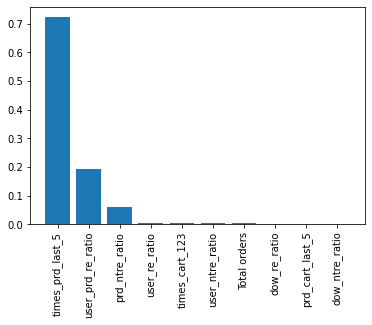

In [ ]:
#feature importance
imp=model.feature_importances_
print(imp)
#sort feature importance in desc order
indices=np.argsort(imp)[::-1]

feature_names=x_train.columns
#rearrange feature names to match importances
name=[feature_names[i] for i in indices]
#barplot
plt.bar(range(10),imp[indices])
plt.xticks(range(10),name)
plt.xticks(rotation='vertical')
plt.show()

**<h3>MODEL3-RANDOM FOREST**

random search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param = {'max_depth':[3,5,7],'n_estimators':[100,200,300],'class_weight':['balanced',{0:1,1:5},{0:1,1:10}]}   #class weight coz imbalance data
#print(param_grid)
model=RandomForestClassifier()
clf = RandomizedSearchCV(model,param,cv=3, return_train_score=True, scoring='f1',n_jobs=-1)   #3-fold cv
clf.fit(x_tr, y_train)   #no need to normalize for RF but u can use normalize features too

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
clf.cv_results_

{'mean_fit_time': array([ 672.94282945,  854.07353115, 1274.61827421,  844.96158918,
        1698.22018067,  641.23209643,  867.02099077, 2577.28997318,
        2519.69872872,  803.27677719]),
 'mean_score_time': array([22.2881039 , 33.74267435, 51.47834682, 34.64059536, 50.51568445,
        22.41698186, 34.56763093, 76.0662055 , 61.52143908, 24.91836619]),
 'mean_test_score': array([0.36044816, 0.41128257, 0.3492553 , 0.35951812, 0.41899865,
        0.35190339, 0.3445786 , 0.36338643, 0.35134566, 0.35230652]),
 'mean_train_score': array([0.36061166, 0.41117152, 0.34923284, 0.35950585, 0.41944194,
        0.35193963, 0.3446129 , 0.36373342, 0.35170639, 0.35269719]),
 'param_class_weight': masked_array(data=['balanced', {0: 1, 1: 5}, {0: 1, 1: 10}, 'balanced',
                    {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 10}, 'balanced',
                    {0: 1, 1: 10}, {0: 1, 1: 10}],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

In [ ]:
clf.best_estimator_  #best params

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model with best params

In [ ]:
model=RandomForestClassifier(max_depth=7,n_estimators=200,class_weight={0: 1, 1: 5})  #model with best params
model.fit(x_tr,y_train)  #fitting
y_tr_pred=model.predict(x_tr)  #predicting
y_cv_pred=model.predict(x_cv)

In [ ]:
from sklearn.metrics import f1_score
f1_tr=f1_score(y_tr_pred,y_train)
print('train f1 score:', f1_tr ) #train f1 score

train f1 score: 0.41895097319774954


In [ ]:
f1_cv=f1_score(y_cv_pred,y_cv)
print('cv f1 score:', f1_cv )  #cv f1 score

cv f1 score: 0.41912509540982956


[0.02427411 0.00679578 0.00741799 0.31887921 0.08595123 0.47700482
 0.00427904 0.07223666 0.00230034 0.00086082]


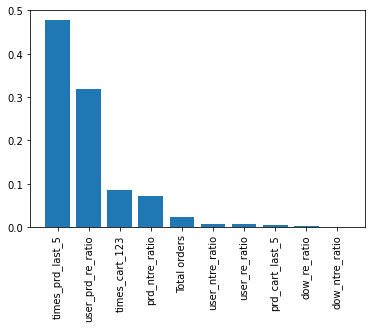

In [ ]:
#feature importance
imp=model.feature_importances_
print(imp)
#sort feature importance in desc order
indices=np.argsort(imp)[::-1]

feature_names=x_train.columns
#rearrange feature names to match importances
name=[feature_names[i] for i in indices]
#barplot
plt.bar(range(10),imp[indices])
plt.xticks(range(10),name)
plt.xticks(rotation='vertical')
plt.show()

**<H3>MODEL4-XGBOOST**

In [ ]:
from xgboost import XGBClassifier
param = {'max_depth':[5,10],'columnsample_bytree':[0.3,0.4],'scale_pos_weight':[5,10]}   # scale_pos_weight[=#negatv/#postive typically] for imbalance data
#print(param_grid)
model=XGBClassifier()
clf = RandomizedSearchCV(model,param,cv=3, return_train_score=True, scoring='f1') #3-fold cv
clf.fit(x_tr, y_train)

[10:04:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [ ]:
clf.cv_results_

{'mean_fit_time': array([408.72351106, 407.60453057, 912.81498742, 917.45172636,
        391.34418837, 386.82822633, 888.4146506 , 914.87764502]),
 'mean_score_time': array([ 9.22137006,  9.19939192, 19.39472143, 19.5601999 ,  9.15172505,
         9.16294177, 19.34151363, 19.30330427]),
 'mean_test_score': array([0.26552771, 0.26552771, 0.26513089, 0.26513089, 0.26552771,
        0.26552771, 0.26513089, 0.26513089]),
 'mean_train_score': array([0.26627913, 0.26627913, 0.28069902, 0.28069902, 0.26627913,
        0.26627913, 0.28069902, 0.28069902]),
 'param_columnsample_bytree': masked_array(data=[0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5, 10, 10, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_scale_pos_weights': m

In [ ]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, columnsample_bytree=0.3,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scale_pos_weights=5, seed=None, silent=None, subsample=1,
              verbosity=1)

In [ ]:
xgbc=XGBClassifier(columnsample_bytree=0.3,max_depth=5,scale_pos_weight=5) #model with best parms
xgbc.fit(x_tr,y_train)  #fitting
y_tr_pred=xgbc.predict(x_tr) #predicting
y_cv_pred=xgbc.predict(x_cv)

[08:49:10] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, columnsample_bytree=0.3,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import f1_score
f1_tr=f1_score(y_tr_pred,y_train)
print('train f1 score:', f1_tr )

train f1 score: 0.4226661748570595


In [ ]:
f1_cv=f1_score(y_cv_pred,y_cv)
print('cv f1 score:', f1_cv )

cv f1 score: 0.4226914564447804


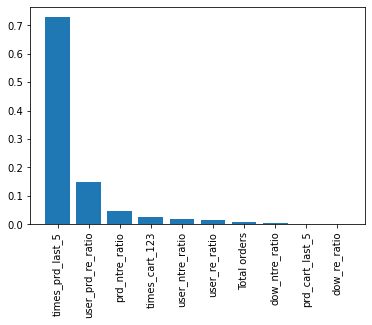

In [ ]:
#feature importance
imp=model.feature_importances_
#sort feature importance in desc order
indices=np.argsort(imp)[::-1]
feature_names=x_tr.columns
#rearrange feature names to match importances
name=[feature_names[i] for i in indices]
#barplot
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)),name)
plt.xticks(rotation='vertical')
plt.show()

**<H3>MODEL 5-LGBM**

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21411 (delta 8), reused 0 (delta 0), pack-reused 21394
Receiving objects: 100% (21411/21411), 16.89 MiB | 22.97 MiB/s, done.
Resolving deltas: 100% (15670/15670), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728       

In [ ]:
! cd /content/LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1  ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

Random search cv

In [ ]:
from lightgbm import LGBMClassifier
param = {'max_depth':[5,8,10],'learning_rate':[0.1,0.15,0.2],'n_estimators':[100,150,200],'class_weight':[{0:1,1:5},{0:1,1:10}] }  #
#print(param_grid)
model=LGBMClassifier(device_type='gpu')
clf = RandomizedSearchCV(model,param,cv=3, return_train_score=True, scoring='f1')   #3-fold cv
clf.fit(x_tr, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            device_type='gpu',
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            r..., silent=True,
                                            subsample=1.0,
        

In [ ]:
clf.cv_results_

{'mean_fit_time': array([16.38340298, 15.51516819, 20.36983673, 23.53687859, 17.29748344,
        21.40092015, 15.77084804, 19.229937  , 27.83470146, 17.29399506]),
 'mean_score_time': array([ 4.23818668,  4.84739542,  6.75891415,  7.97976494,  5.48701326,
         7.90462788,  4.73615599,  6.40953779, 11.17211668,  5.58058612]),
 'mean_test_score': array([0.42141187, 0.42217864, 0.36042694, 0.36086257, 0.42162983,
        0.36042455, 0.35940204, 0.36042346, 0.42235603, 0.35954764]),
 'mean_train_score': array([0.42260701, 0.42319276, 0.3617905 , 0.36316241, 0.42236215,
        0.36165578, 0.36024123, 0.36194569, 0.4234159 , 0.36023938]),
 'param_class_weight': masked_array(data=[{0: 1, 1: 5}, {0: 1, 1: 5}, {0: 1, 1: 10},
                    {0: 1, 1: 10}, {0: 1, 1: 5}, {0: 1, 1: 10},
                    {0: 1, 1: 10}, {0: 1, 1: 10}, {0: 1, 1: 5},
                    {0: 1, 1: 10}],
              mask=[False, False, False, False, False, False, False, False,
                    False, F

In [ ]:
clf.best_estimator_   #best params

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 5},
               colsample_bytree=1.0, device_type='gpu', importance_type='split',
               learning_rate=0.1, max_depth=5, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

 model  with best params

In [ ]:
#fitting model with best param
lgbm=LGBMClassifier(device_type='gpu',class_weight={0:1,1:5},learning_rate=0.1,max_depth=5,n_estimators=200)
lgbm.fit(x_tr,y_train)

In [ ]:
from sklearn.metrics import f1_score
y_tr_pred=lgbm.predict(x_tr)
tr_f1=f1_score(y_tr_pred,y_train)
print('f1 score for train:',tr_f1)

f1 score for train: 0.42323728563824353


In [ ]:
y_cv_pred=lgbm.predict(x_cv)
cv_f1=f1_score(y_cv_pred,y_cv)
print('f1 score for cv:',cv_f1)

f1 score for cv: 0.4229607006439822


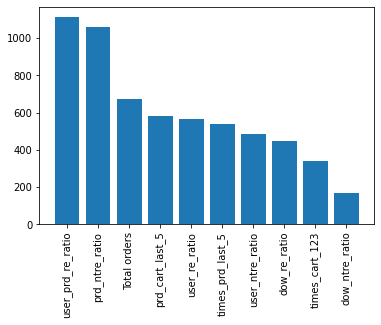

In [ ]:
#feature importance
imp=lgbm.feature_importances_
#sort feature importance in desc order
indices=np.argsort(imp)[::-1]
feature_names=x_tr.columns
#rearrange feature names to match importances
name=[feature_names[i] for i in indices]
#barplot
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)),name)
plt.xticks(rotation='vertical')
plt.show()

**<h3>MODEL6- Catboost**

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
param = {'max_depth':[5,8,10],'learning_rate':[0.1,0.15,0.2],'n_estimators':[100,150,200],'scale_pos_weight':[5,10] }  # scale_pos_weight[=#negatv/#postive typically] for imbalance data
#print(param_grid)
model=CatBoostClassifier(task_type='GPU',verbose=False)
clf = RandomizedSearchCV(model,param,cv=3, return_train_score=True, scoring='f1')   #3-fold cv
clf.fit(x_tr, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fe251d46090>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.1, 0.15, 0.2],
                                        'max_depth': [5, 8, 10],
                                        'n_estimators': [100, 150, 200],
                                        'scale_pos_weight': [5, 10]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='f1', verbose=0)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([3.02341922, 3.78354049, 2.99499178, 7.6569438 , 4.59391292,
        3.00415214, 7.63888804, 3.7715652 , 6.12028766, 3.00573977]),
 'mean_score_time': array([1.67770537, 1.71356924, 1.6749955 , 1.80416512, 2.00308077,
        1.6433843 , 1.80599141, 1.6725657 , 2.14727084, 1.71789408]),
 'mean_test_score': array([0.35885428, 0.36092195, 0.35782846, 0.42192455, 0.36152846,
        0.42177212, 0.42192691, 0.42177679, 0.36192584, 0.35664371]),
 'mean_train_score': array([0.35915027, 0.36214699, 0.35818336, 0.42359064, 0.36487968,
        0.42188106, 0.42453215, 0.42238477, 0.36593582, 0.3568193 ]),
 'param_learning_rate': masked_array(data=[0.2, 0.2, 0.15, 0.1, 0.2, 0.1, 0.15, 0.1, 0.15, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 8, 5, 8, 10, 5, 8, 8, 10, 5],
              mask=[False, False, False, 

In [ ]:
clf.best_params_

{'learning_rate': 0.15,
 'max_depth': 8,
 'n_estimators': 200,
 'scale_pos_weight': 5}

In [ ]:
cat=CatBoostClassifier(learning_rate= 0.15,max_depth= 8,n_estimators= 200,scale_pos_weight= 5,verbose=False) #model with best parms
cat.fit(x_tr,y_train)  #fitting
y_tr_pred=cat.predict(x_tr) #predicting
y_cv_pred=cat.predict(x_cv)

In [ ]:
from sklearn.metrics import f1_score  
f1_tr=f1_score(y_tr_pred,y_train)
print('train f1 score:', f1_tr )

train f1 score: 0.42326660501729363


In [ ]:
f1_cv=f1_score(y_cv_pred,y_cv)  
print('cv f1 score:', f1_cv )

cv f1 score: 0.4225307318037922


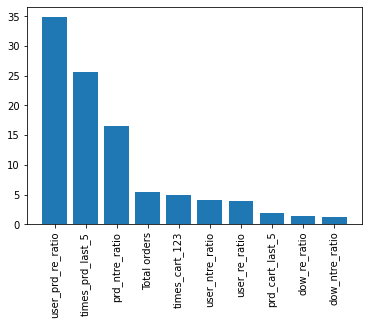

In [ ]:
#feature importance
imp=cat.feature_importances_
#sort feature importance in desc order
indices=np.argsort(imp)[::-1]
feature_names=x_tr.columns
#rearrange feature names to match importances
name=[feature_names[i] for i in indices]
#barplot
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)),name)
plt.xticks(rotation='vertical')
plt.show()

**RESULT Summary**

In [ ]:
! pip install -U prettytable

Requirement already up-to-date: prettytable in /usr/local/lib/python3.7/dist-packages (2.1.0)


In [ ]:
#ref:https://pypi.org/project/prettytable/
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=["Model","Train F1 score","CV f1 score"]
table.add_row(["Logistic Regression",0.41813947038094595,0.27154717375508164])
table.add_row(["Decision Tree",0.4188730139929286,0.4170827358637251])
table.add_row(["Random Forest",0.41895097319774954,0.41912509540982956])
table.add_row(["XGBOOST",0.4226661748570595,0.4226914564447804])
table.add_row(["LGBM", 0.42323728563824353,0.4229607006439822])
table.add_row(["CatBoost", 0.42326660501729363,0.4225307318037922])
print(table)

+---------------------+---------------------+---------------------+
|        Model        |    Train F1 score   |     CV f1 score     |
+---------------------+---------------------+---------------------+
| Logistic Regression | 0.41813947038094595 | 0.27154717375508164 |
|    Decision Tree    |  0.4188730139929286 |  0.4170827358637251 |
|    Random Forest    | 0.41895097319774954 | 0.41912509540982956 |
|       XGBOOST       |  0.4226661748570595 |  0.4226914564447804 |
|         LGBM        | 0.42323728563824353 |  0.4229607006439822 |
|       CatBoost      | 0.42326660501729363 |  0.4225307318037922 |
+---------------------+---------------------+---------------------+


Since **XGBOOST,LGBM and Catboost** gave approx same result.I'm trying all three on test data and checking kaggle score.

In order to submit on kaggle ,we want order_id corresponding to all test users and not their user_id.

In [ ]:
ord_id=pd.read_csv('/content/drive/MyDrive/Instacart/test_final.csv')[['user_id','order_id','product_id']]
ord_id.head()

,user_id,order_id,product_id
0,3,2774568,248
1,3,2774568,1005
2,3,2774568,1819
3,3,2774568,7503
4,3,2774568,8021


<h3> 1.predicting y(reordered or not) for test using model4 i.e. XGBOOST

In [ ]:
te_df['pred_xgbc']=xgbc.predict(te_df)

In [ ]:
te_df.head()

Total orders  user_re_ratio  ...  dow_ntre_ratio  pred_xgbc
user_id product_id                               ...                           
3       248              0.09375          0.625  ...             0.0        0.0
        1005             0.09375          0.625  ...             0.0        0.0
        1819             0.09375          0.625  ...             0.0        0.0
        7503             0.09375          0.625  ...             0.0        0.0
        8021             0.09375          0.625  ...             0.0        0.0

[5 rows x 11 columns]

In [ ]:
te_df=te_df.reset_index()  #resetting index
final_xgbc=te_df[['user_id','product_id','pred_xgbc']]  #selecting only required cols
final_xgbc.head()  

,user_id,product_id,pred_xgbc
0,3,248,0.0
1,3,1005,0.0
2,3,1819,0.0
3,3,7503,0.0
4,3,8021,0.0


In [ ]:
final_xgbc.to_csv('/content/drive/MyDrive/Instacart/final_xgbc.csv')

merging ord_id with final_xgbc on user_id and product_id

In [ ]:
final_df=final_xgbc.merge(ord_id,on=['user_id','product_id'],how='left')
final_df.drop('user_id',axis=1,inplace=True)  #removing user_id as not req
final_df.head()

,product_id,pred_xgbc,order_id
0,248,0.0,2774568
1,1005,0.0,2774568
2,1819,0.0,2774568
3,7503,0.0,2774568
4,8021,0.0,2774568


Submission file for xgboost:-

In [ ]:
final_df['product_id']=final_df['product_id'].astype(int)

In [ ]:
#creating dict with order_id as key as values as prod_id to be reordered
dct=dict()
for row in final_df.itertuples():   #for each row
  if row.pred_xgbc==1:      #if pred=1 means reorder
    if row.order_id in dct:    #if order_id in dct
      dct[row.order_id] = dct[row.order_id]+' '+str(row.product_id)  #add product_id
    else:                               #if order_id not in dct
      dct[row.order_id]=str(row.product_id)  #add prd_id as first value

#if no product is ordered by any order_id we hv to substitute None as value
for order_id in final_df.order_id:
  if order_id not in  dct:
    dct[order_id] ='None'


In [ ]:
#convert dct into df
sub_df=pd.DataFrame.from_dict(dct,orient='index')
sub_df.head()

,0
2774568,17668 18599 21903 22035 39190 43961 47766 48523
1528013,8424 21903 38293
1376945,8309 13176 14947 17706 20383 24799 27959 28465...
1356845,5746 7076 10863 11520 13176 14992 22959 30489
2161313,196 1747 10441 11266 12427 14715 27839 37710 4...


In [ ]:
sub_df.shape[0]

75000

In [ ]:
#convert to csv
sub_df.to_csv('/content/drive/MyDrive/Instacart/sub_xgbc.csv',index=False)

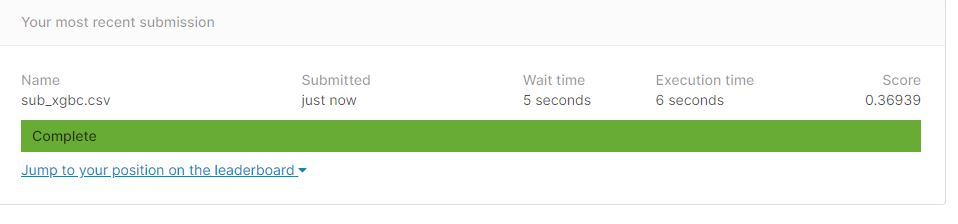

<h3> 2.predicting y(reordered or not) for test using model5 i.e. LGBM

In [ ]:
te_df['pred']=lgbm.predict(te_df)

In [ ]:
te_df=te_df.reset_index()  #resetting index
final=te_df[['user_id','product_id','pred']]  #selecting only required cols
final.head()  

,user_id,product_id,pred
0,3,248,0.0
1,3,1005,0.0
2,3,1819,0.0
3,3,7503,0.0
4,3,8021,0.0


In [ ]:
final.to_csv('/content/drive/MyDrive/Instacart/final_lgbm.csv')

merging ord_id with final_lgbm on user_id and product_id

In [ ]:
final_df=final_lgbm.merge(ord_id,on=['user_id','product_id'],how='left')
final_df.drop('user_id',axis=1,inplace=True)  #removing user_id as not req
final_df.head()

,product_id,pred,order_id
0,248,0.0,2774568
1,1005,0.0,2774568
2,1819,0.0,2774568
3,7503,0.0,2774568
4,8021,0.0,2774568


In [ ]:
final_df['product_id']=final_df['product_id'].astype(int)

In [ ]:
#creating dict with order_id as key as values as prod_id to be reordered
dct=dict()
for row in final_df.itertuples():   #for each row
  if row.pred==1:      #if pred=1 means reorder
    if row.order_id in dct:    #if order_id in dct
      dct[row.order_id] = dct[row.order_id]+' '+str(row.product_id)  #add product_id
    else:                               #if order_id not in dct
      dct[row.order_id]=str(row.product_id)  #add prd_id as first value

#if no product is ordered by any order_id we hv to substitute None as value
for order_id in final_df.order_id:
  if order_id not in  dct:
    dct[order_id] ='None'


In [ ]:
#conver dct into df
sub_df=pd.DataFrame.from_dict(dct,orient='index')
sub_df.head()

,0
2774568,17668 18599 21903 22035 39190 43961 47766
1528013,8424 21903 38293
1376945,8309 13176 14947 17706 20383 24799 27959 28465...
1356845,5746 7076 10863 11520 13176 14992 22959 30489
2161313,196 1747 10441 11266 12427 14715 27839 37710 4...


In [ ]:
#set index
sub_df.reset_index(inplace=True)
#set cols names
sub_df.columns=['order_id','products']
sub_df.head()

,order_id,products
0,2774568,17668 18599 21903 22035 39190 43961 47766
1,1528013,8424 21903 38293
2,1376945,8309 13176 14947 17706 20383 24799 27959 28465...
3,1356845,5746 7076 10863 11520 13176 14992 22959 30489
4,2161313,196 1747 10441 11266 12427 14715 27839 37710 4...


In [ ]:
sub_df.dtypes

order_id     int64
products    object
dtype: object

In [ ]:
sub_df.shape[0]

75000

In [ ]:
#convert to csv
sub_df.to_csv('/content/drive/MyDrive/Instacart/sub_lgbm.csv',index=False)

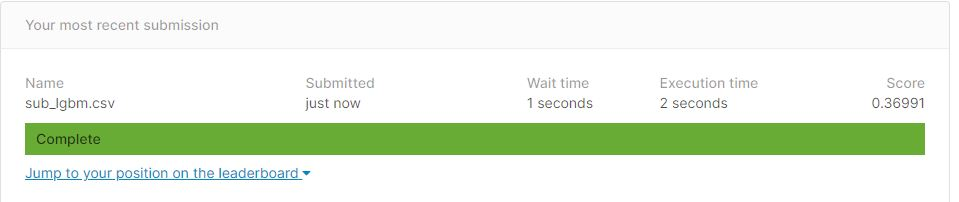

<h3> 3. predicting y(reordered or not) for test using model6 i.e. CATBOOST

In [ ]:
te_df['pred_cat']=cat.predict(te_df)

In [ ]:
te_df=te_df.reset_index()  #resetting index
final_cat=te_df[['user_id','product_id','pred_cat']]  #selecting only required cols
final_cat.head()  

,user_id,product_id,pred_cat
0,3,248,0.0
1,3,1005,0.0
2,3,1819,0.0
3,3,7503,0.0
4,3,8021,0.0


In [ ]:
final_cat.to_csv('/content/drive/MyDrive/Instacart/final_cat.csv')

merging ord_id with final_cat on user_id and product_id

In [ ]:
final_df=final_cat.merge(ord_id,on=['user_id','product_id'],how='left')
final_df.drop('user_id',axis=1,inplace=True)  #removing user_id as not req
final_df.head()

,product_id,pred_cat,order_id
0,248,0.0,2774568
1,1005,0.0,2774568
2,1819,0.0,2774568
3,7503,0.0,2774568
4,8021,0.0,2774568


In [ ]:
final_df['product_id']=final_df['product_id'].astype(int)

In [ ]:
#creating dict with order_id as key as values as prod_id to be reordered
dct=dict()
for row in final_df.itertuples():   #for each row
  if row.pred_cat==1:      #if pred=1 means reorder
    if row.order_id in dct:    #if order_id in dct
      dct[row.order_id] = dct[row.order_id]+' '+str(row.product_id)  #add product_id
    else:                               #if order_id not in dct
      dct[row.order_id]=str(row.product_id)  #add prd_id as first value

#if no product is ordered by any order_id we hv to substitute None as value
for order_id in final_df.order_id:
  if order_id not in  dct:
    dct[order_id] ='None'


In [ ]:
#convert dct into df
sub_df=pd.DataFrame.from_dict(dct,orient='index')
sub_df.head()

,0
2774568,17668 18599 21903 22035 39190 43961 47766
1528013,8424 21903 38293
1376945,8309 13176 14947 17706 20383 24799 27959 28465...
1356845,5746 7076 10863 11520 13176 14992 21616 22959 ...
2161313,196 1747 10441 11266 12427 14715 27839 37710 4...


In [ ]:
#set index
sub_df.reset_index(inplace=True)
#set cols names
sub_df.columns=['order_id','products']
sub_df.head()

,order_id,products
0,2774568,17668 18599 21903 22035 39190 43961 47766
1,1528013,8424 21903 38293
2,1376945,8309 13176 14947 17706 20383 24799 27959 28465...
3,1356845,5746 7076 10863 11520 13176 14992 21616 22959 ...
4,2161313,196 1747 10441 11266 12427 14715 27839 37710 4...


In [ ]:
sub_df.shape[0]

75000

In [ ]:
#convert to csv
sub_df.to_csv('/content/drive/MyDrive/Instacart/sub_cat.csv',index=False)

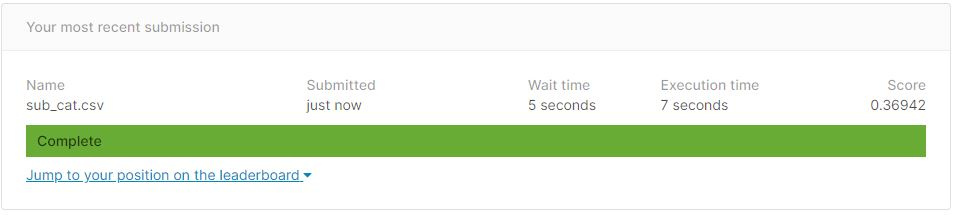

In [1]:
#ref:https://pypi.org/project/prettytable/
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=["Models","Train F1 score","CV f1 score",'kaggle score']
table.add_row(["Logistic Regression",0.41813947038094595,0.27154717375508164,'-'])
table.add_row(["Decision Tree",0.4188730139929286,0.4170827358637251,'-'])
table.add_row(["Random Forest",0.41895097319774954,0.41912509540982956,'-'])
table.add_row(["XGBOOST",0.4226661748570595,0.4226914564447804,0.36939])
table.add_row(["LGBM", 0.42323728563824353,0.4229607006439822,0.36991])
table.add_row(["CatBoost", 0.42326660501729363,0.4225307318037922,0.36942])
print(table)

+---------------------+---------------------+---------------------+--------------+
|        Models       |    Train F1 score   |     CV f1 score     | kaggle score |
+---------------------+---------------------+---------------------+--------------+
| Logistic Regression | 0.41813947038094595 | 0.27154717375508164 |      -       |
|    Decision Tree    |  0.4188730139929286 |  0.4170827358637251 |      -       |
|    Random Forest    | 0.41895097319774954 | 0.41912509540982956 |      -       |
|       XGBOOST       |  0.4226661748570595 |  0.4226914564447804 |   0.36939    |
|         LGBM        | 0.42323728563824353 |  0.4229607006439822 |   0.36991    |
|       CatBoost      | 0.42326660501729363 |  0.4225307318037922 |   0.36942    |
+---------------------+---------------------+---------------------+--------------+


**so my final model selected is lgbm**